<a href="https://colab.research.google.com/github/aross-sermons/MLA_ARS/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
# Explore the shape of the dataset
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
# Check missing values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

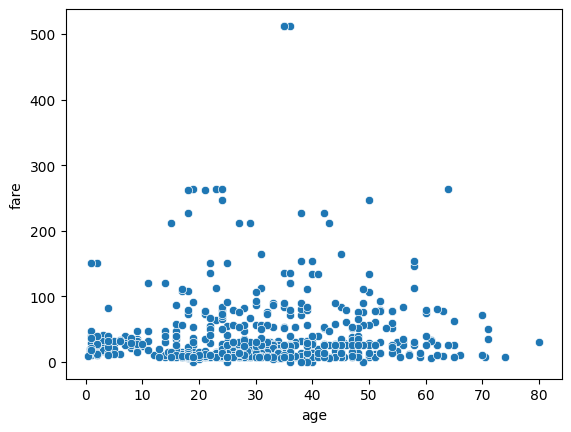

In [ ]:
# Plot age against fare
sns.scatterplot(x='age', y='fare', data=titanic)
plt.show()

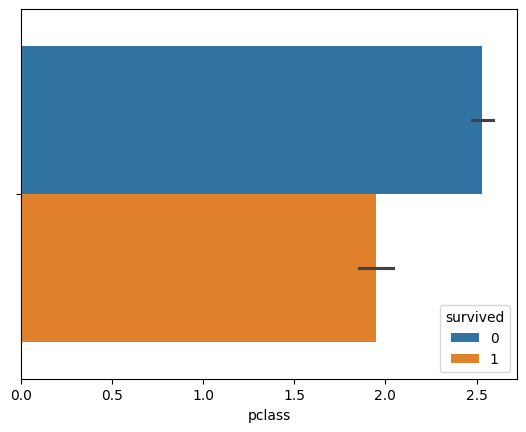

In [ ]:
# Plot survived against pclass
sns.barplot(x='pclass', data=titanic, hue='survived')
plt.show()

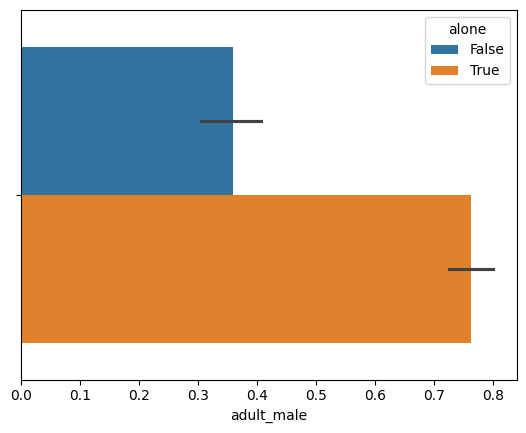

In [ ]:
# Plot adult_male against alone
sns.barplot(x='adult_male', data=titanic, hue='alone')
plt.show()

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']


### Split the data into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
from sklearn.impute import SimpleImputer

# Define numerical and categorical features
numeric_features = ['age', 'fare', 'pclass']
categorical_features = ['sex', 'embarked', 'who', 'alone']

# Create a column transformer preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])



## Training data with multiple models

In [ ]:
# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.770949720670391

Model: Random Forest
Accuracy: 0.8156424581005587

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.770949720670391

Model: Gradient Boosting
Accuracy: 0.8379888268156425


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
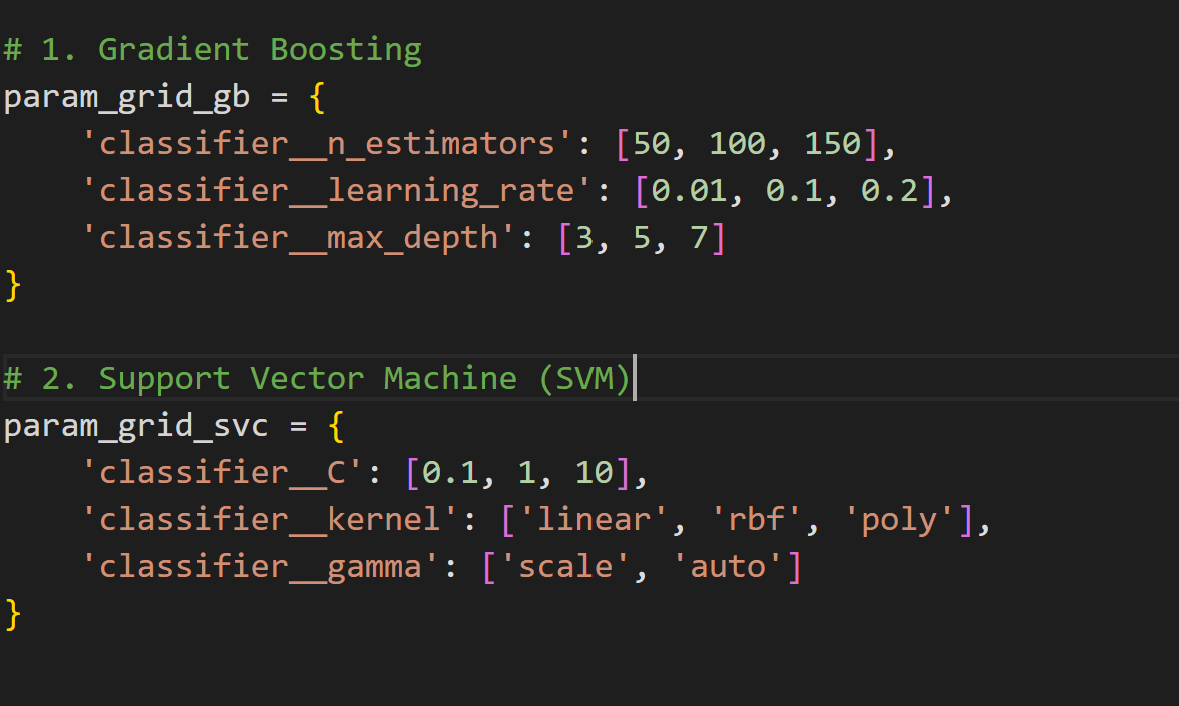

In [ ]:
# 1. Paramter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
}

# 2. Parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

## List of models and their corresponding parameter grids
Example
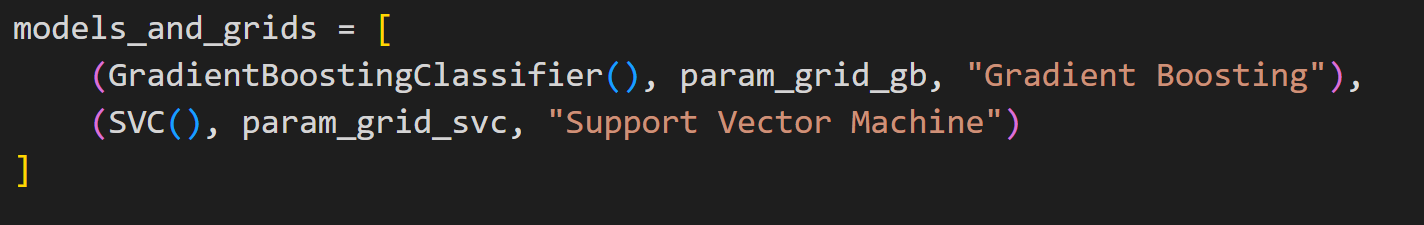

In [ ]:
models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, 'Gradient Boosting'),
    (RandomForestClassifier(), param_grid_rf, 'Random Forest')
]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8314

Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best cross-validation accuracy for Random Forest: 0.8258


## 7.Reflection and Analysis
**Top Models Pre-tuning:**
Gradient Boosting: 83.79%
Random Forest: 81.56%

**Top Models Post-tuning**:
Gradient Boosting: 83.14%
Random Forest: 82.58%

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?  
The Gradient Boosting Classifier had the highest accuracy score before tuning.

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?  
The two top-performing models were Gradient Boosting and Random Forest. After hyperparameter tuning, Gradient Boostning dropped slightly in accuracy and Random Forest increased.

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?  
Random Forest showed the most improvement with an increase of 1.02%, while Gradient Boosting dropped by 0.65%.

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?  
Gradient Boosting's n_estimators and max_depth increased slightly, which lead to overfitting for the data. They are not optimal. Random Forest's max_depth, split samples, and n_estimators also increased slightly, leading to a better accuracy score.

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?  
Gradient Boosting experienced overfitting when it dropped in accuracy by 0.65% after tuning. Based on the findings I would select Gradient Boosting, since it still has the higher accuracy after tuning and performs well with the size of the dataset.

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.  
I would deploy Random Forest because it performs only slightly less than Gradient Boosting and is easier to tune without overfitting.